In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
matplotlib.style.use('ggplot')
#ols models
import statsmodels.formula.api as sm
from patsy import dmatrices
import re
import scipy as sp

In [ ]:
#column names
def print_columns(dataframe):
    i = 0
    for column in dataframe.columns:
        print((i, column))
        i += 1

In [ ]:
#read data
df_full = pd.read_csv("../../Data/NEM_CurrentlyInterconnectedDataset_2016-03-31.csv", low_memory=False)

In [ ]:
#get year from date
df_full.ix[:,15] =  pd.to_datetime(df_full.ix[:,15], infer_datetime_format=True)
df_full['App Complete Date Year'] = df_full.ix[:,15].dt.year
df_full.columns = df_full.columns.str.replace(' ','_')
df_full = df_full[(df_full.T != 0).all()]

In [ ]:
print_columns(df_full)

In [ ]:
df = df_full[(df_full['App_Complete_Date_Year'] > 2014) & (df_full['Total_System_Cost'] > 0.0)]
df['Installer_Name_clear'] = df['Installer_Name']

In [ ]:
df.shape

In [ ]:
df['Customer_Sector'].value_counts()

In [ ]:
#create dummies for companies
def company_dummy(row, templ, name):
    if not pd.isnull(row['Installer_Name_clear']):
        if templ.search(row['Installer_Name_clear']):
            val = name
        else:
            val = row['Installer_Name_clear']
    else:
        val = row['Installer_Name_clear']
    return val

In [ ]:
#regexes to clean installer names

In [ ]:
company_regex = r'SolarCity'
replace_name = 'SolarCity Corporation'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'SunPower'
replace_name = 'SunPower Corporation'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'Sunrun'
replace_name = 'Sunrun Installation Services, Inc'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'Petersen\s+Dean'
replace_name = 'Petersen Dean Roofing & Solar Systems'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
company_regex = r'Semper Solaris'
replace_name = 'Semper Solaris Construction Inc'
p = re.compile(company_regex, re.IGNORECASE)
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
#Solarcity , Luminalt, RGS Energy, Vivint - biggest installers 

In [ ]:
df['Installer_Name_clear'] = df.apply (lambda row: company_dummy (row, p, replace_name),axis=1)

In [ ]:
df['Installer_Name_clear'].value_counts()

In [ ]:
df_short = df[['Total_System_Cost', 'System_Size_DC', 'System_Size_AC', 'Installer_Name_clear']]

In [ ]:
df_short = df_short[(df['Customer_Sector'] == 'Residential')]

In [ ]:
df_short['Count'] = 1

In [166]:
df_short['Price_Per_Watt'] = df_short['Total_System_Cost']/df_short['System_Size_AC']/1000
df_short = df_short[df_short['Price_Per_Watt'] > 1.0]
df_sub = df_short[df_short['Installer_Name_clear'] == 'Zero Energy Associates']
#exclude huge outlier to make graph nicer
df_short = df_short[df['Installer_Name_clear'] != 'Zero Energy Associates']

/Users/wilfeli/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [167]:
df_short['key1'] = df_short.groupby('Installer_Name_clear')['Count'].transform('sum')

In [168]:
df_short = df_short.sort_values(['key1'], ascending=[False])

In [169]:
grouped = df_short.groupby('Installer_Name_clear', sort=False)

In [170]:
df_agg = grouped.agg({'Total_System_Cost' : np.median,\
             'System_Size_AC' : np.median, \
            'Count' : np.sum, \
            'Price_Per_Watt' : np.median})

In [171]:
df_agg_top = df_agg[0:100]

In [172]:
df_agg_top

,Total_System_Cost,Price_Per_Watt,Count,System_Size_AC
Installer_Name_clear,,,,
SolarCity Corporation,25779.00,5.924523,3868,4.408000
SunPower Corporation,7301.00,4.292210,1451,1.779000
Petersen Dean Roofing & Solar Systems,27078.05,4.721451,1007,5.813000
"Sunrun Installation Services, Inc",22869.00,4.259788,746,5.446000
Semper Solaris Construction Inc,26901.00,5.033030,621,5.262000
Sullivan Solar Power,30285.50,5.181970,498,5.874000
Verengo,24628.00,4.704745,473,5.225000
Grid Alternatives,15790.83,5.197207,410,3.056000
American Solar Direct Inc,25936.95,5.320786,369,4.739000


In [173]:
#df_agg_top.plot(kind='scatter', x='Price_Per_Watt', y='System_Size_AC', s=df_agg_top['Count'], cmap = cmap)

/Users/wilfeli/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


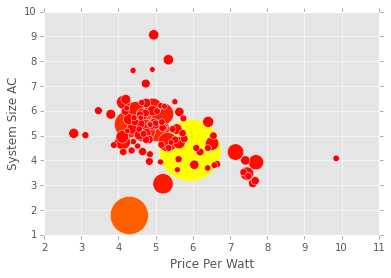

In [180]:
N = 100
x = df_agg_top['Price_Per_Watt']
y = df_agg_top['System_Size_AC']
norm = matplotlib.colors.Normalize(vmin=df_agg_top['Count'][99], vmax=df_agg_top['Count'][0])
cmap_custom = cm.get_cmap('autumn')
area = norm(df_agg_top['Count'])
color = []

for area_x in area:
    color.append(cmap_custom(area_x))
plt.xlabel('Price Per Watt')
plt.ylabel('System Size AC')
plt.subtitle()
plt.scatter(x, y, s=df_agg_top['Count'],  c = color )
plt.savefig('foo.png', dpi=300)
plt.show()

In [141]:
df_sub['Price_Per_Watt'].describe()

count    395.000000
mean      17.499276
std       13.255935
min        1.765459
25%        9.360898
50%       20.250720
75%       22.952134
max      172.626441
Name: Price_Per_Watt, dtype: float64

In [147]:
df_sub

,Total_System_Cost,System_Size_DC,System_Size_AC,Installer_Name_clear,Count,Price_Per_Watt,key1
399682,21999,0.884694,0.867,Zero Energy Associates,1,25.373702,395
375698,20100,0.898446,0.867,Zero Energy Associates,1,23.183391,395
399657,30849,2.655102,2.602,Zero Energy Associates,1,11.855880,395
384836,20292,0.903125,0.867,Zero Energy Associates,1,23.404844,395
368217,18000,0.903125,0.867,Zero Energy Associates,1,20.761246,395
363585,24231,0.880203,0.867,Zero Energy Associates,1,27.948097,395
378290,19999,3.962437,3.903,Zero Energy Associates,1,5.124007,395
375872,19899,0.898446,0.867,Zero Energy Associates,1,22.951557,395
384832,35934,3.839583,3.686,Zero Energy Associates,1,9.748779,395
396991,19899,0.880203,0.867,Zero Energy Associates,1,22.951557,395
